In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load single file

In [6]:
seism_path = "./data/train/seis/"
fault_path = "./data/train/fault/"
shape = (128, 128, 128)
i = 100
seis = np.fromfile(seism_path + str(i) + '.dat', dtype=np.single)
fault = np.fromfile(fault_path + str(i) + '.dat', dtype=np.single)
seis = np.reshape(seis, shape)
fault = np.reshape(fault, shape)
seis = np.transpose(seis)
fault = np.transpose(fault)

# Normalize image

In [7]:
mean = np.mean(seis)
std = np.std(seis)
seis = seis - mean
seis = seis / std
seis = np.transpose(seis)
fault = np.transpose(fault)

In [7]:
def plot3d(seis, fault):
    # Create figure and 3D axes
    fig = plt.figure(figsize=(12, 6))
    seis_ax = fig.add_subplot(121, projection='3d')
    fault_ax = fig.add_subplot(122, projection='3d')
    # Generate coordinates for each point in the volume
    x, y, z = np.meshgrid(np.arange(seis.shape[0]), np.arange(seis.shape[1]), np.arange(seis.shape[2]))
    # coordinates for plotting
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    # Create a scatter plot for seismic image
    seis_ax.scatter(x, y, z, c=seis.flatten(), cmap=plt.cm.bone, marker='.')
    seis_ax.set_xlabel('X')
    seis_ax.set_ylabel('Y')
    seis_ax.set_zlabel('Z')
    seis_ax.set_title('Seismic 3D image')
    # Create a scatter plot for fault segment
    fault_ax.scatter(x, y, z, c=fault.flatten(), cmap=plt.cm.bone, marker='.')
    fault_ax.set_xlabel('X')
    fault_ax.set_ylabel('Y')
    fault_ax.set_zlabel('Z')
    fault_ax.set_title('Fault segment 3D image')
    # Adjust spacing between subplots
    fig.subplots_adjust(wspace=0.3)
    # Show the plot
    plt.tight_layout()
    plt.show()

In [8]:
def plot2d(seis, fault, at=1):
    # Create figure and axes
    fig = plt.figure(figsize=(15, 5))
    seis_slice_ax = fig.add_subplot(131)
    seis_slice_ax.set_title('Seismic 2D sliced image')
    seis_slice_ax.imshow(seis, vmin=-2, vmax=2, cmap=plt.cm.bone, interpolation='bicubic', aspect=at)
    fault_slice_ax = fig.add_subplot(132)
    fault_slice_ax.imshow(fault, vmin=0, vmax=1, cmap=plt.cm.bone, interpolation='bicubic', aspect=at)
    fault_slice_ax.set_title('Fault segment 2D sliced image')
    plt.tight_layout()
    plt.show()

# Plot3D image shape=(128, 128, 128)

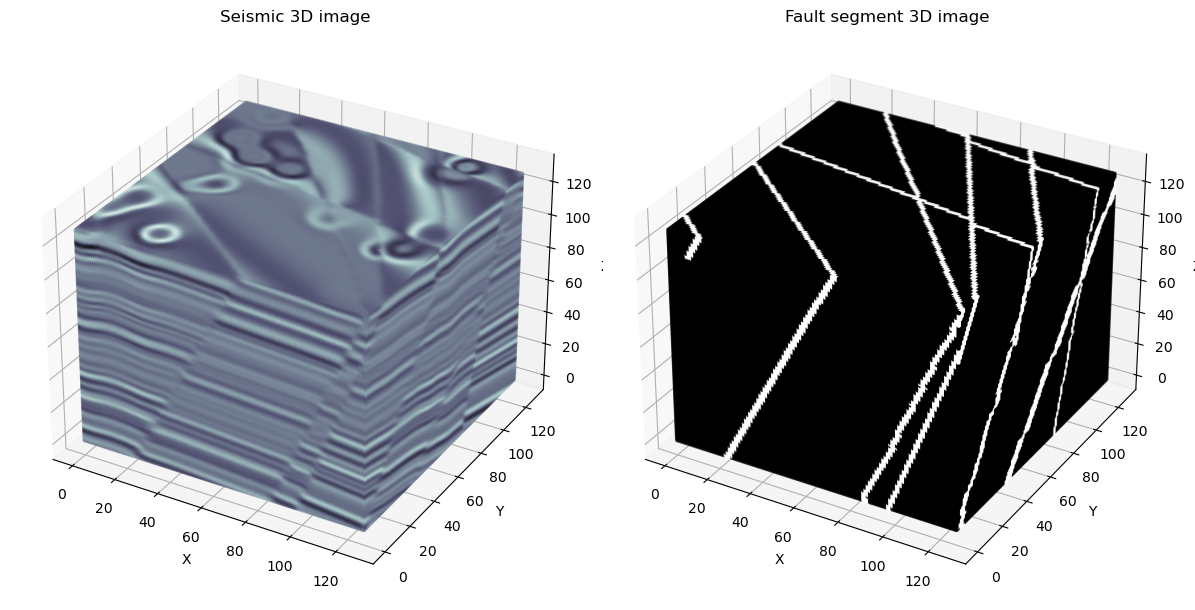

In [9]:
plot3d(seis, fault)

In [10]:
slice = 50
seis_slice = seis[slice, :, :]
fault_slice = fault[slice, :, :]

# Plot2D slice image shape=(128, 128)

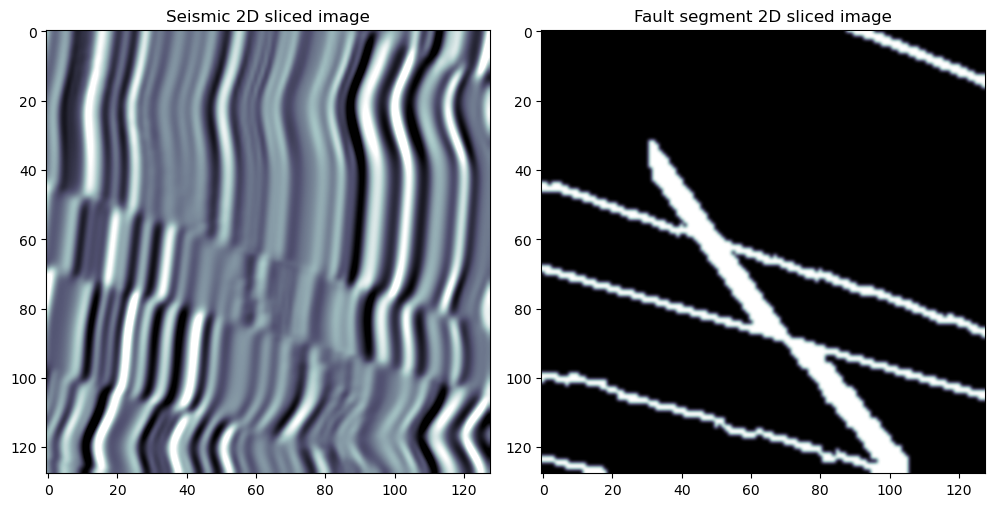

In [11]:
plot2d(seis_slice, fault_slice)